In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/spam.csv', encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4166,ham,Are you at work right now ?,NaN,NaN,NaN
234,spam,Text & meet someone sexy today. U can find a d...,NaN,NaN,NaN
3909,ham,She.s good. She was wondering if you wont say ...,NaN,NaN,NaN
5262,ham,Did you see that film:),NaN,NaN,NaN
5341,ham,And of course you should make a stink!,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

- Data cleaning
- EDA
- Text Preprocessing
- Model Building
- Evaluation
- Improvement
- Website
- Deploy

# 1) Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
475,ham,Ok I'm gonna head up to usf in like fifteen mi...
639,ham,I had askd u a question some hours before. Its...
1894,spam,"FreeMsg Hey U, i just got 1 of these video/pic..."
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
4520,ham,Hi good mornin.. Thanku wish u d same..


In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,text
4756,0,"hey, looks like I was wrong and one of the kap..."
5485,0,Also fuck you and your family for going to rho...
1761,0,Got ur mail Dileep.thank you so muchand look f...
4308,0,He dint tell anything. He is angry on me that ...
1637,1,"0A$NETWORKS allow companies to bill for SMS, s..."


In [7]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(403)

In [9]:
df = df.drop_duplicates(keep='first')
df.sample(5)

,target,text
1481,0,"I'm a guy, browsin is compulsory"
2528,0,jay says he'll put in &lt;#&gt;
4434,1,Don't b floppy... b snappy & happy! Only gay c...
4702,0,Mmmmmmm *snuggles into you* ...*deep contented...
644,0,Allo! We have braved the buses and taken on th...


## 2) EDA

In [10]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

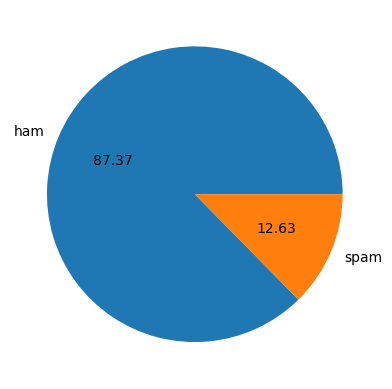

In [11]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [12]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Krishil
[nltk_data]     Agrawal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [13]:
df['num_characters'] = df['text'].apply(len)   # length of the characters in the sentence
df.sample(5)

,target,text,num_characters
3021,0,How dare you change my ring,27
1245,0,Hello which the site to download songs its urg...,53
157,0,"Hello, my love. What are you doing? Did you ge...",157
845,0,Meanwhile in the shit suite: xavier decided to...,231
4517,0,That sucks. So what do you got planned for you...,94


In [14]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.sample(5)

,target,text,num_characters,num_words
2594,0,"Thatï¿½ï¿½ï¿½s the thing with apes, u can figh...",132,30
3067,0,Boy you best get yo ass out here quick,38,9
692,0,"My sister in law, hope you are having a great ...",76,18
4348,0,ï¿½ï¿½ bot notes oredi... Cos i juz rem i got...,48,12
5422,0,Ok k..sry i knw 2 siva..tats y i askd..,39,14


In [15]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,target,text,num_characters,num_words,num_sentences
3968,0,Thanks for your message. I really appreciate y...,202,46,5
230,0,Get down in gandhipuram and walk to cross cut ...,109,28,2
3025,0,I finished my lunch already. U wake up already?,47,11,2
1156,0,Hey.. Something came up last min.. Think i wun...,70,17,2
592,1,PRIVATE! Your 2003 Account Statement for 07753...,148,24,3


In [16]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.00000,5169.000000,5169.000000
mean,79.23196,18.455794,1.965564
std,58.33921,13.324758,1.448541
min,2.00000,1.000000,1.000000
25%,36.00000,9.000000,1.000000
50%,61.00000,15.000000,1.000000
75%,117.00000,26.000000,2.000000
max,910.00000,220.000000,38.000000


In [17]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.684234,17.123782,1.820195
std,56.435582,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.346095,27.667688,2.970904
std,30.261787,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,225.000000,46.000000,9.000000


In [19]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

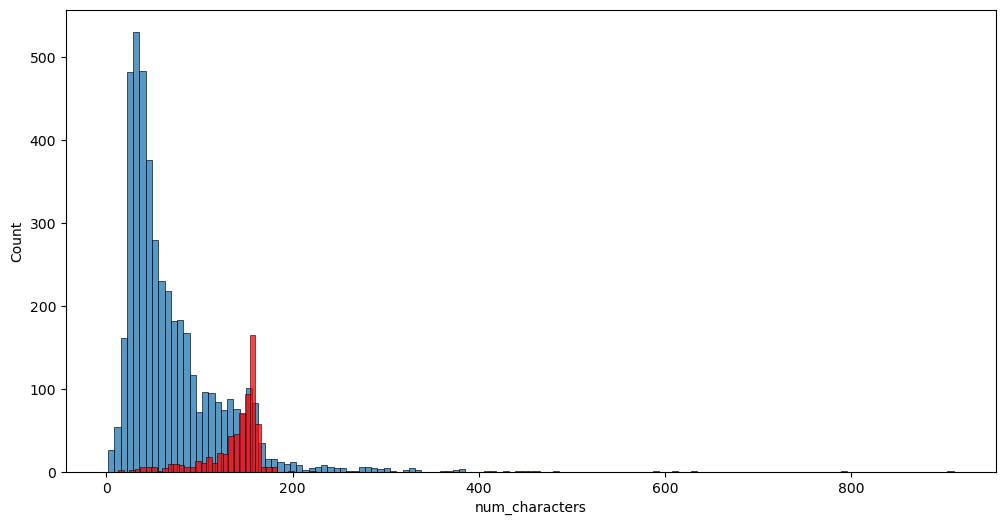

In [20]:
plt.figure(figsize=(12, 6))
# sns.histplot(df[df['target'] == 0]['num_characters'])    #* another way
sns.histplot(data=df[df['target'] == 0], x='num_characters')
sns.histplot(data=df[df['target'] == 1], x='num_characters', color='red')

<Axes: xlabel='num_words', ylabel='Count'>

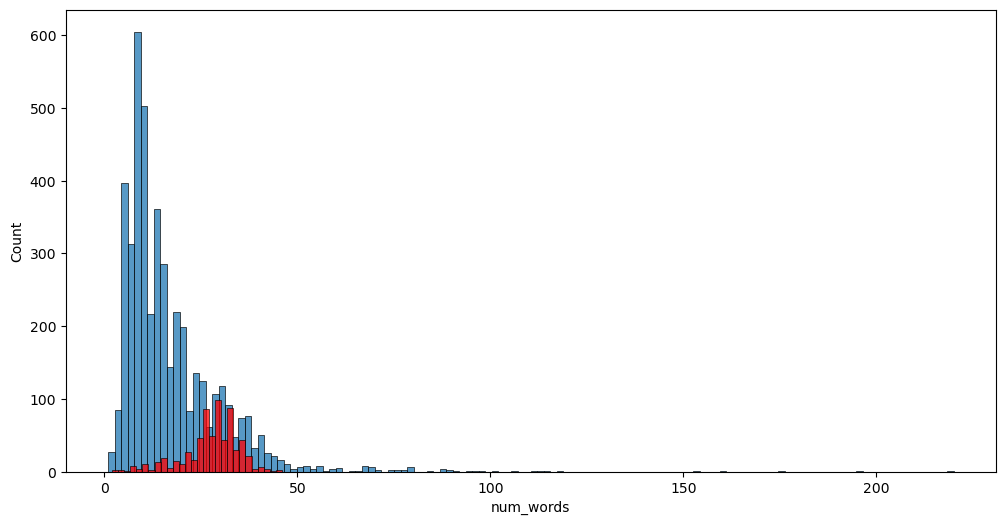

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['target'] == 0], x='num_words')
sns.histplot(data=df[df['target'] == 1], x='num_words', color='red')

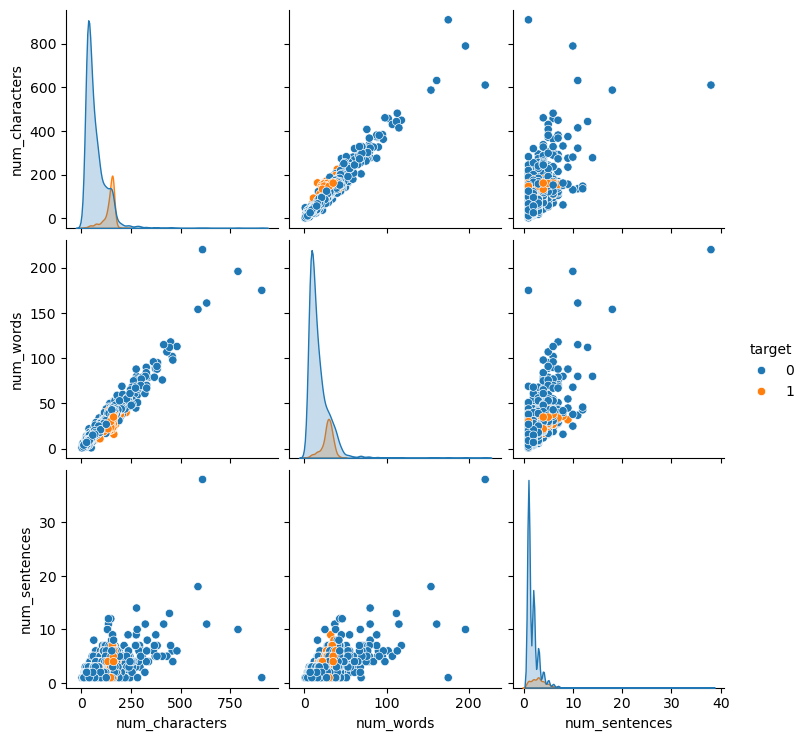

In [22]:
sns.pairplot(df, hue='target')

<Axes: >

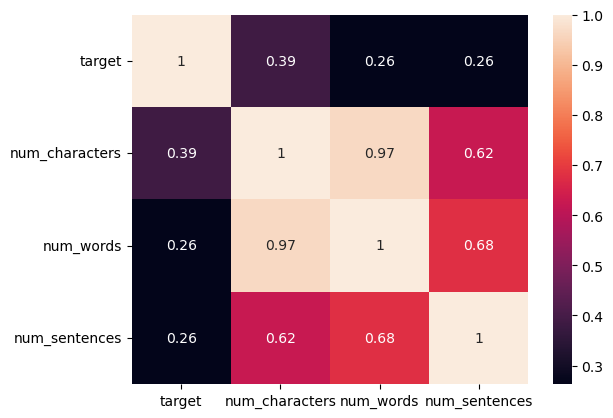

In [23]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

## 3) Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuations
- Stemming/lamentization: converting the words with same type (eg: converting danced, dancing and dance into dance)

In [24]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [25]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem('loving')

'love'

In [27]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []

  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [28]:
transform_text('Hi , how are you krishil? %%')

'hi krishil'

In [29]:
transform_text('did you like my presentation on ml')

'like present ml'

In [30]:
transform_text('I loved youttube lectures on machine learning. what about you?')

'love youttub lectur machin learn'

In [31]:
df['transformed_text'] = df['text'].apply(transform_text)
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
2683,0,I'm okay. Chasing the dream. What's good. What...,66,18,4,okay chase dream good next
2573,1,Congrats 2 mobile 3G Videophones R yours. call...,160,35,7,congrat 2 mobil 3g videophon r call 0906345813...
2544,0,She is our sister.. She belongs 2 our family.....,289,71,4,sister belong 2 famili hope tomorrow pray 4 fa...
3290,0,I'm not smoking while people use \wylie smokes...,85,18,1,smoke peopl use smoke justifi ruin shit
1520,1,"URGENT! Your Mobile No was awarded a ï¿½2,000 ...",160,30,4,urgent mobil award bonu caller prize 2nd attem...


In [32]:
from wordcloud import WordCloud
wc = WordCloud(height=500, width=500, min_font_size=10, background_color='white')

In [33]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

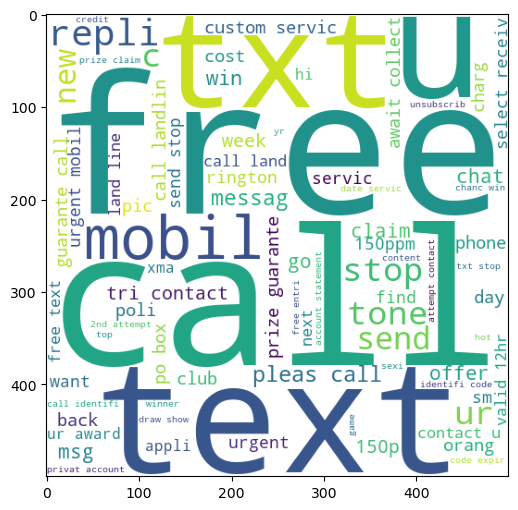

In [34]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

In [35]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

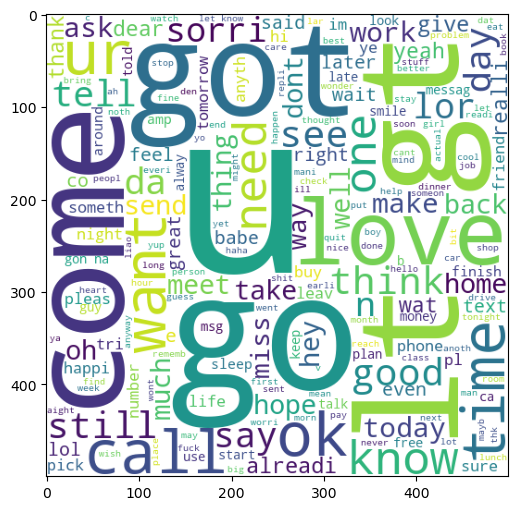

In [36]:
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

In [37]:
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].to_list():
  for word in msg.split():
    spam_corpus.append(word)

In [38]:
from collections import Counter

counter_dataframe = pd.DataFrame(Counter(spam_corpus).most_common(30))
counter_dataframe

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


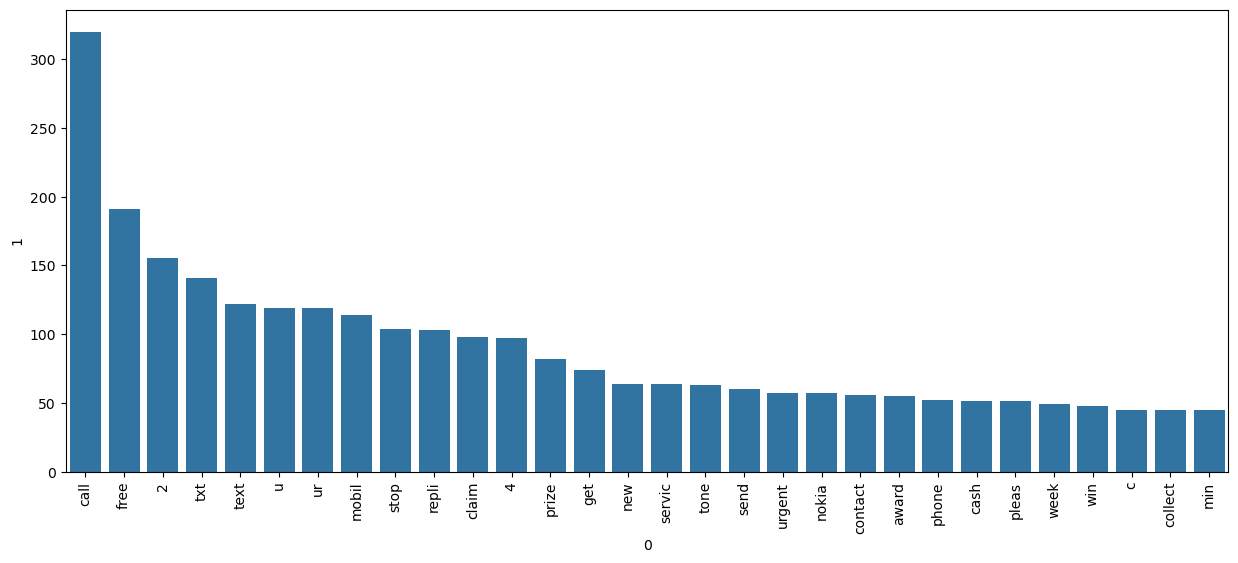

In [39]:
plt.figure(figsize=(15, 6))
sns.barplot(x=counter_dataframe[0], y=counter_dataframe[1])
plt.xticks(rotation='vertical')
plt.show()

In [40]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].to_list():
  for word in msg.split():
    ham_corpus.append(word)

In [41]:
from collections import Counter

counter_dataframe1 = pd.DataFrame(Counter(ham_corpus).most_common(30))
counter_dataframe1

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


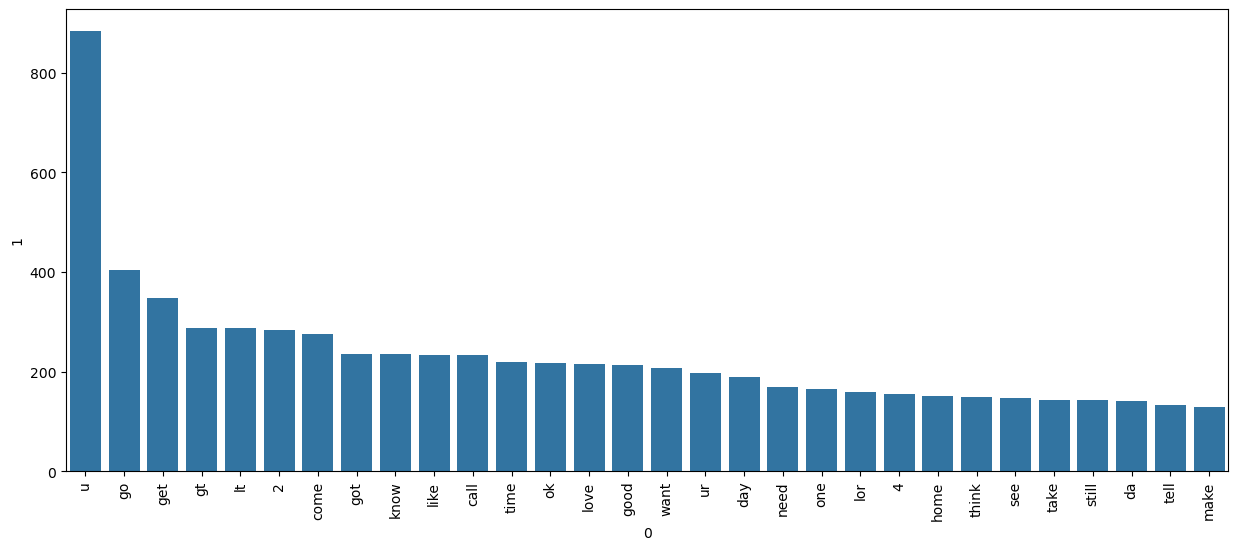

In [42]:
plt.figure(figsize=(15, 6))
sns.barplot(x=counter_dataframe1[0], y=counter_dataframe1[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [128]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [129]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tf.fit_transform(df['transformed_text']).toarray()  #type: ignore

In [ ]:
#* step towards increasing the model performance
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

#* not increasing the performance of the model, so it is recommend to not to scale

In [ ]:
# appending num_characters to the X

# X = np.hstack((X, df['num_characters'].values.reshape(-1, 1)))

#* does not improve the performance of the model

In [131]:
X.shape   #* 5169 sms and 6674 words

(5169, 3000)

In [132]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [134]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [135]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [136]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred1):.4f}")
print(f"Precision: {precision_score(y_test, y_pred1):.4f}") #* having different score while you are changing the position of the parameters
print(confusion_matrix(y_test, y_pred1))

Accuracy: 0.8772
Precision: 0.5238
[[786 110]
 [ 17 121]]


In [137]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))   #* having different score while you are changing the position of the parameters

0.9796905222437138
[[890   6]
 [ 15 123]]
0.9534883720930233


In [138]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))   #* having different score while you are changing the position of the parameters

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


- Here the accuracy score would not matter a lot because it might not always be the most relevant, especially in cases with skewed datasets or where certain types of errors are more critical than others. This is particularly true for Naive Bayes classifiers, where precision can often be a more valuable indicator of performance than accuracy
- In datasets with imbalanced classes (where one class significantly outweighs the other), a model can achieve high accuracy by simply predicting the majority class for all instances.
- For example, if 95% of emails are "not spam", a model that always predicts "not spam" will have 95% accuracy, but it's useless for identifying spam.
- In such cases, accuracy becomes misleading and fails to reflect the model's ability to correctly identify the minority class, which is often the class of interest (e.g., fraudulent transactions, rare diseases).
- Precision, on the other hand, focuses on true positives and measures the proportion of positive predictions that are actually correct. A high precision indicates that when the model predicts a positive class, it is usually right, which is crucial in scenarios like spam filtering or medical diagnosis.


we choose tfidf --> mnb

## 5. Model Comparison

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [140]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [141]:
clfs = {
  'SVC': svc,
  'KN': knc,
  'NB': mnb,
  'DT': dtc,
  'LR': lrc,
  'RF': rfc,
  'AdaBoost': abc,
  'BgC': bc,
  'ETC': etc,
  'GBDT': gbdt,
  'xgb': xgb
}

In [142]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [143]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9700193423597679, 0.9421487603305785)

In [144]:
clfs.items()

dict_items([('SVC', SVC(gamma=1.0, kernel='sigmoid')), ('KN', KNeighborsClassifier()), ('NB', MultinomialNB()), ('DT', DecisionTreeClassifier(max_depth=5)), ('LR', LogisticRegression(penalty='l1', solver='liblinear')), ('RF', RandomForestClassifier(n_estimators=50, random_state=2)), ('AdaBoost', AdaBoostClassifier(random_state=2)), ('BgC', BaggingClassifier(n_estimators=50, random_state=2)), ('ETC', ExtraTreesClassifier(n_estimators=50, random_state=2)), ('GBDT', GradientBoostingClassifier(n_estimators=50, random_state=2)), ('xgb', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_

In [145]:
# accuracy_scores = []
# precision_scores = []
# accuracy_scores1 = []
# precision_scores1 = []
accuracy_scores2 = []
precision_scores2 = []

for name, clf, in clfs.items():

  current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

  print('For ', name)
  print('Accuracy - ', current_accuracy)
  print('Precision - ', current_precision)

  accuracy_scores2.append(current_accuracy)
  precision_scores2.append(current_precision)

For  SVC
Accuracy -  0.9700193423597679
Precision -  0.9421487603305785
For  KN
Accuracy -  0.9042553191489362
Precision -  0.975609756097561
For  NB
Accuracy -  0.9796905222437138
Precision -  0.9534883720930233
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8247422680412371
For  LR
Accuracy -  0.9680851063829787
Precision -  0.9646017699115044
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.8661417322834646
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.9709864603481625
Precision -  0.95


In [147]:
# performance_df1 = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)
# performance_df1
# performance_df2 = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores1, 'Precision': precision_scores1}).sort_values('Precision', ascending=False)
# performance_df2
performance_df5 = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores2, 'Precision': precision_scores2}).sort_values('Precision', ascending=False)
performance_df5

,Algorithm,Accuracy,Precision
8,ETC,0.977756,0.983193
1,KN,0.904255,0.975610
5,RF,0.972921,0.974138
4,LR,0.968085,0.964602
2,NB,0.979691,0.953488
10,xgb,0.970986,0.950000
0,SVC,0.970019,0.942149
9,GBDT,0.947776,0.920000
7,BgC,0.956480,0.866142
3,DT,0.927466,0.824742


In [149]:
# performance_df1 = pd.melt(performance_df2, id_vars=["Algorithm"])
# performance_df1
performance_df6 = pd.melt(performance_df5, id_vars=["Algorithm"])
performance_df6

,Algorithm,variable,value
0,ETC,Accuracy,0.977756
1,KN,Accuracy,0.904255
2,RF,Accuracy,0.972921
3,LR,Accuracy,0.968085
4,NB,Accuracy,0.979691
5,xgb,Accuracy,0.970986
6,SVC,Accuracy,0.970019
7,GBDT,Accuracy,0.947776
8,BgC,Accuracy,0.956480
9,DT,Accuracy,0.927466


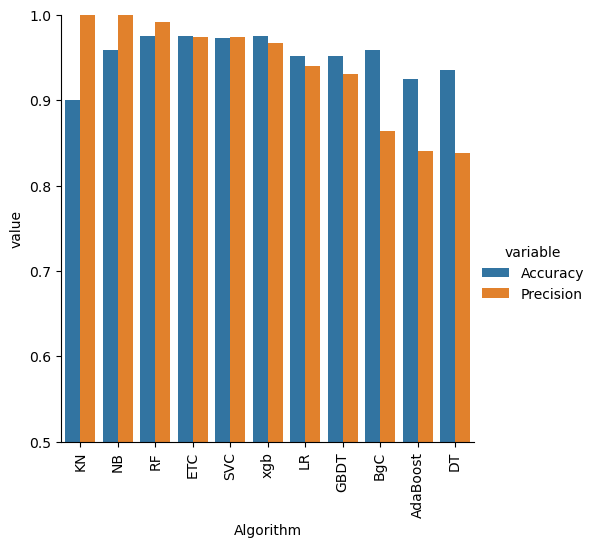

In [101]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

## 6. Improve model performance

1) Change the max_features parameter of Tfidf

In [157]:
temp = performance_df.merge(performance_df5, on='Algorithm')
temp.merge(performance_df2, on='Algorithm')

,Algorithm,Accuracy_x,Precision_x,Accuracy_y,Precision_y,Accuracy,Precision
0,KN,0.900387,1.000000,0.904255,0.975610,0.905222,1.000000
1,NB,0.959381,1.000000,0.979691,0.953488,0.971954,1.000000
2,RF,0.975822,0.991304,0.972921,0.974138,0.972921,0.974138
3,ETC,0.974855,0.974576,0.977756,0.983193,0.977756,0.983193
4,SVC,0.972921,0.974138,0.970019,0.942149,0.977756,0.975207
5,xgb,0.974855,0.966667,0.970986,0.950000,0.970986,0.950000
6,LR,0.951644,0.940000,0.968085,0.964602,0.956480,0.969697
7,GBDT,0.951644,0.931373,0.947776,0.920000,0.947776,0.920000
8,BgC,0.959381,0.863636,0.956480,0.866142,0.956480,0.866142
9,AdaBoost,0.924565,0.840909,0.921663,0.820225,0.921663,0.820225


In [156]:
temp

,Algorithm,Accuracy_x,Precision_x,Accuracy_y,Precision_y
0,KN,0.900387,1.000000,0.904255,0.975610
1,NB,0.959381,1.000000,0.979691,0.953488
2,RF,0.975822,0.991304,0.972921,0.974138
3,ETC,0.974855,0.974576,0.977756,0.983193
4,SVC,0.972921,0.974138,0.970019,0.942149
5,xgb,0.974855,0.966667,0.970986,0.950000
6,LR,0.951644,0.940000,0.968085,0.964602
7,GBDT,0.951644,0.931373,0.947776,0.920000
8,BgC,0.959381,0.863636,0.956480,0.866142
9,AdaBoost,0.924565,0.840909,0.921663,0.820225


2) Use voting classifier

In [160]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [161]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [162]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [163]:
y_pred = voting.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9816247582205029
0.976
[[893   3]
 [ 16 122]]


3) Applying stacking

In [164]:
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [165]:
from sklearn.ensemble import StackingClassifier

In [166]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [167]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

KeyboardInterrupt: 

In [169]:
import pickle
pickle.dump(tf, open("tfidf.pkl", "wb"))
pickle.dump(mnb, open("model.pkl", "wb"))

In [170]:
# Create and train the final model for deployment
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

print("=== Creating Final Model for Deployment ===")

# 1. Use the best vectorizer and model combination
# From previous analysis, TF-IDF with Multinomial NB performed well
tfidf_vectorizer = TfidfVectorizer(max_features=3000)

# Fit on the entire dataset (no train/test split for final model)
X_tfidf_final = tfidf_vectorizer.fit_transform(df['transformed_text']).toarray()
y_final = df['target'].values

print(f"Final dataset shape: {X_tfidf_final.shape}")
print(f"Target distribution: {np.bincount(y_final)}")

# 2. Train the final model
final_model = MultinomialNB()
final_model.fit(X_tfidf_final, y_final)

print("✅ Model training completed!")

# 3. Test the model with a sample prediction
test_message = "Congratulations! You've won $1000! Call now to claim your prize!"
test_transformed = transform_text(test_message)
test_vector = tfidf_vectorizer.transform([test_transformed])
test_prediction = final_model.predict(test_vector)[0]

print(f"\nTest message: '{test_message}'")
print(f"Prediction: {'Spam' if test_prediction == 1 else 'Not Spam'}")

# 4. Save the trained model and vectorizer
pickle.dump(tfidf_vectorizer, open('tfidf.pkl', 'wb'))
pickle.dump(final_model, open('model.pkl', 'wb'))

print("\n✅ Model and vectorizer saved successfully!")
print("📁 Files saved:")
print("   - tfidf.pkl (TF-IDF vectorizer)")
print("   - model.pkl (Trained MultinomialNB model)")

# 5. Verify the saved files work
print("\n🔍 Verifying saved files...")
loaded_tfidf = pickle.load(open('tfidf.pkl', 'rb'))
loaded_model = pickle.load(open('model.pkl', 'rb'))

# Test with the loaded model
test_vector_loaded = loaded_tfidf.transform([test_transformed])
test_prediction_loaded = loaded_model.predict(test_vector_loaded)[0]

print(f"Loaded model prediction: {'Spam' if test_prediction_loaded == 1 else 'Not Spam'}")
print("✅ Verification successful! Your Streamlit app should work now.")

=== Creating Final Model for Deployment ===
Final dataset shape: (5169, 3000)
Target distribution: [4516  653]
✅ Model training completed!

Test message: 'Congratulations! You've won $1000! Call now to claim your prize!'
Prediction: Spam

✅ Model and vectorizer saved successfully!
📁 Files saved:
   - tfidf.pkl (TF-IDF vectorizer)
   - model.pkl (Trained MultinomialNB model)

🔍 Verifying saved files...
Loaded model prediction: Spam
✅ Verification successful! Your Streamlit app should work now.
